## **Optimization Algorithms: A Comprehensive Guide**


# **1. Introduction**

- **Concept**: Optimization algorithms are used to minimize or maximize a function by adjusting model parameters iteratively. In machine learning, optimizers update the model's weights (parameters) to reduce the error or cost function.
- **Goal**: The primary goal of optimization is to find the optimal parameters (weights) that minimize the cost function.


# **2. Gradient Descent (GD)**

Gradient Descent is the most commonly used optimization algorithm. It aims to find the minimum of a function by iteratively moving towards the negative gradient (downhill direction).


The update rule for Gradient Descent is:

theta = theta - eta * (gradient of J(theta))

Where:
- theta represents the model parameters (weights)
- eta is the learning rate (controls the step size)
- gradient of J(theta) is the gradient of the cost function J(theta) with respect to theta


- **theta** are the weights (model parameters) we want to optimize.
- **eta** (learning rate) determines how big each step should be during the update.
- **gradient of J(theta)** tells us the direction and magnitude of the steepest ascent of the cost function. By subtracting this, we move towards the minimum of the cost function.


# **Code Implementation: Gradient Descent**

In [1]:
import numpy as np

# Simple implementation of GD
def gradient_descent(X, y, theta, lr, epochs):
    m = len(y)
    history = []  # To store the loss values
    for epoch in range(epochs):
        predictions = X.dot(theta)
        gradients = (1/m) * X.T.dot(predictions - y)
        theta -= lr * gradients
        loss = (1/(2*m)) * np.sum((predictions - y)**2)
        history.append(loss)
    return theta, history


- **Explanation**:
  - `X.dot(theta)` calculates the model's prediction based on the current parameter values.
  - `gradients` are computed as the derivative of the cost function with respect to theta.
  - We update the parameters by subtracting the scaled gradient.
  - The **loss** is calculated using Mean Squared Error (MSE), and the algorithm aims to minimize this loss.


# **3. Stochastic Gradient Descent (SGD)**

Stochastic Gradient Descent (SGD) is a variant of Gradient Descent where the parameters are updated after each data point, instead of after calculating the gradient over the entire dataset. This can make the algorithm faster, especially for large datasets, but introduces more variance in the updates.


In SGD, the update rule is similar to Gradient Descent, but the gradient is calculated for a single data point at each iteration:

theta = theta - eta * (gradient of J(theta^(i)))

Where:
- theta represents the model parameters (weights)
- eta is the learning rate
- gradient of J(theta^(i)) is the gradient of the cost function for a single data point


- In SGD, we compute the gradient for one randomly selected data point at a time. This introduces randomness in the updates, which can lead to faster convergence but may cause instability (fluctuating updates).
- As a result, SGD can converge faster but may take more time to stabilize compared to full-batch Gradient Descent.


# **Code Implementation: Stochastic Gradient Descent**

In [2]:
def stochastic_gradient_descent(X, y, theta, lr, epochs):
    m = len(y)
    history = []
    for epoch in range(epochs):
        for i in range(m):
            random_index = np.random.randint(m)
            xi = X[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
            theta -= lr * gradients
        predictions = X.dot(theta)
        loss = (1/(2*m)) * np.sum((predictions - y)**2)
        history.append(loss)
    return theta, history


- **Explanation**:
  - Instead of calculating gradients for the entire dataset, we randomly pick one data point (`xi`) and compute the gradient for that point.
  - The parameter **theta** is updated after each data point, which may cause more fluctuation in the loss curve.


# **4. Adam Optimizer**

Adam (Adaptive Moment Estimation) is an advanced optimization algorithm that combines **Momentum** and **RMSProp** techniques. It adjusts the learning rate for each parameter and adapts the learning rate based on the first and second moments (gradients and squared gradients).


Adam uses the following equations for parameter updates:

1. First Moment (m):

m_t = beta1 * m_(t-1) + (1 - beta1) * (gradient of J(theta))

2. Second Moment (v):

v_t = beta2 * v_(t-1) + (1 - beta2) * (gradient of J(theta))^2

3. Bias-correction:

m_hat_t = m_t / (1 - beta1^t)
v_hat_t = v_t / (1 - beta2^t)

4. Parameter Update:

theta = theta - eta * m_hat_t / (sqrt(v_hat_t) + epsilon)

Where:
- m_t and v_t are the moving averages of the gradient and squared gradient, respectively.
- beta1 and beta2 are decay rates for the momentums.
- eta is the learning rate.
- epsilon is a small constant to prevent division by zero.


- **Momentum** helps accelerate gradient descent in the relevant direction and dampens oscillations.
- **RMSProp** helps by scaling the learning rate based on the magnitude of past gradients, preventing large updates in noisy regions.
- Adam combines these two techniques, making it more robust and adaptive.


# **Code Implementation: Adam Optimizer**

In [3]:
def adam_optimizer(X, y, theta, lr, beta1, beta2, epsilon, epochs):
    m = len(y)
    mt = np.zeros_like(theta)
    vt = np.zeros_like(theta)
    history = []
    for t in range(1, epochs + 1):
        predictions = X.dot(theta)
        gradients = (1/m) * X.T.dot(predictions - y)
        mt = beta1 * mt + (1 - beta1) * gradients
        vt = beta2 * vt + (1 - beta2) * (gradients**2)
        mt_corr = mt / (1 - beta1**t)
        vt_corr = vt / (1 - beta2**t)
        theta -= lr * mt_corr / (np.sqrt(vt_corr) + epsilon)
        loss = (1/(2*m)) * np.sum((predictions - y)**2)
        history.append(loss)
    return theta, history


- **Explanation**:
  - **mt** and **vt** store the exponentially weighted moving averages of the gradient and squared gradient.
  - **mt_corr** and **vt_corr** are corrected versions of **mt** and **vt**, which help correct bias in the early stages of training.
  - We update **theta** by dividing the corrected gradient by the square root of the corrected squared gradient, scaled by the learning rate.


# **5. Visualizing Results**

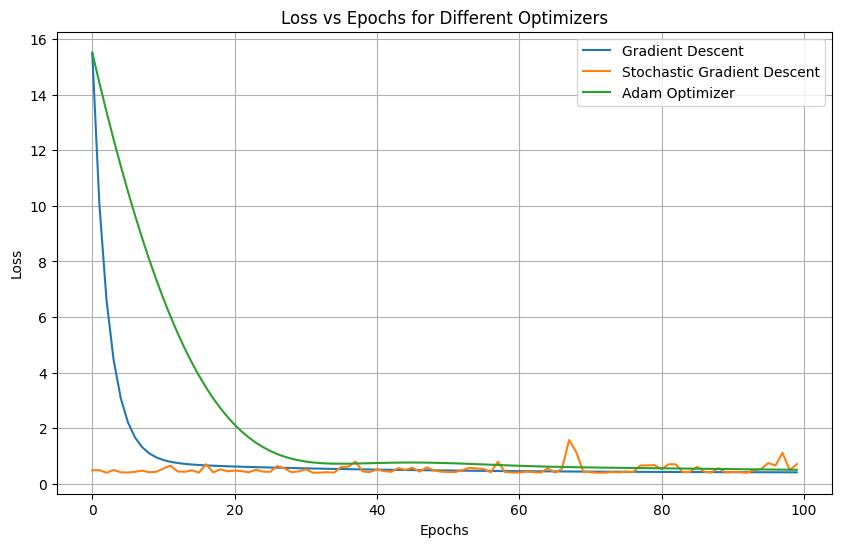

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data (linear relationship)
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # 100 samples, 1 feature
y = 4 + 3 * X + np.random.randn(100, 1)  # Linear relation with some noise

# Adding bias term to X
X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add a column of ones to include the bias term

# Initializing parameters
theta_initial = np.random.randn(2, 1)  # Two parameters (bias and weight)
learning_rate = 0.1
epochs = 100

# Function implementations for optimizers (from the previous code)
def gradient_descent(X, y, theta, lr, epochs):
    m = len(y)
    history = []
    for epoch in range(epochs):
        predictions = X.dot(theta)
        gradients = (1/m) * X.T.dot(predictions - y)
        theta -= lr * gradients
        loss = (1/(2*m)) * np.sum((predictions - y)**2)
        history.append(loss)
    return theta, history

def stochastic_gradient_descent(X, y, theta, lr, epochs):
    m = len(y)
    history = []
    for epoch in range(epochs):
        for i in range(m):
            random_index = np.random.randint(m)
            xi = X[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
            theta -= lr * gradients
        predictions = X.dot(theta)
        loss = (1/(2*m)) * np.sum((predictions - y)**2)
        history.append(loss)
    return theta, history

def adam_optimizer(X, y, theta, lr, beta1, beta2, epsilon, epochs):
    m = len(y)
    mt = np.zeros_like(theta)
    vt = np.zeros_like(theta)
    history = []
    for t in range(1, epochs + 1):
        predictions = X.dot(theta)
        gradients = (1/m) * X.T.dot(predictions - y)
        mt = beta1 * mt + (1 - beta1) * gradients
        vt = beta2 * vt + (1 - beta2) * (gradients**2)
        mt_corr = mt / (1 - beta1**t)
        vt_corr = vt / (1 - beta2**t)
        theta -= lr * mt_corr / (np.sqrt(vt_corr) + epsilon)
        loss = (1/(2*m)) * np.sum((predictions - y)**2)
        history.append(loss)
    return theta, history

# Running all optimizers and capturing their results
theta_gd, history_gd = gradient_descent(X_b, y, theta_initial.copy(), learning_rate, epochs)
theta_sgd, history_sgd = stochastic_gradient_descent(X_b, y, theta_initial.copy(), learning_rate, epochs)
theta_adam, history_adam = adam_optimizer(X_b, y, theta_initial.copy(), 0.1, 0.9, 0.999, 1e-8, epochs)

# Plotting loss curves for comparison
plt.figure(figsize=(10, 6))
plt.plot(history_gd, label="Gradient Descent")
plt.plot(history_sgd, label="Stochastic Gradient Descent")
plt.plot(history_adam, label="Adam Optimizer")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs for Different Optimizers")
plt.legend()
plt.grid()
plt.show()


# **Explanation**
### 2. Generating Synthetic Data (Linear Relationship)
```python
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # 100 samples, 1 feature
y = 4 + 3 * X + np.random.randn(100, 1)  # Linear relation with some noise
```
- **`np.random.seed(42)`**: This sets the random seed so that the random number generation is reproducible. It ensures that you get the same results each time you run the code.
- **`X = 2 * np.random.rand(100, 1)`**: Generates 100 random data points (`X`), each being a 1-dimensional value. These values are scaled to range between 0 and 2.
- **`y = 4 + 3 * X + np.random.randn(100, 1)`**: Here, we define the target variable `y` based on a simple linear model: \( y = 4 + 3X + \epsilon \), where \( \epsilon \) is Gaussian noise added using `np.random.randn()` to make the data more realistic (not perfectly linear).

### 3. Adding Bias Term to the Feature Matrix `X`
```python
X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add a column of ones to include the bias term
```
- **`np.c_[]`**: This is a shorthand notation in numpy for concatenating arrays. In this case, we are adding a column of ones to `X`, making it a bias term.
- The new matrix `X_b` will have 2 columns: one for the bias term (set to 1) and one for the feature values from `X`.

### 4. Initializing Parameters
```python
theta_initial = np.random.randn(2, 1)  # Two parameters (bias and weight)
learning_rate = 0.1
epochs = 100
```
- **`theta_initial = np.random.randn(2, 1)`**: Initializes the model parameters (weights) `theta` randomly. Since we have two features (bias and weight), it will be a 2x1 matrix.
- **`learning_rate = 0.1`**: This is the step size that determines how much the model parameters will change with each update. A higher value may result in overshooting, while a smaller value may result in slower convergence.
- **`epochs = 100`**: The number of iterations the optimizer will run to update the model parameters. Each epoch involves calculating the gradient and updating `theta`.

### 5. Defining Optimization Functions (Gradient Descent, Stochastic Gradient Descent, and Adam)
#### Gradient Descent
```python
def gradient_descent(X, y, theta, lr, epochs):
    m = len(y)
    history = []
    for epoch in range(epochs):
        predictions = X.dot(theta)
        gradients = (1/m) * X.T.dot(predictions - y)
        theta -= lr * gradients
        loss = (1/(2*m)) * np.sum((predictions - y)**2)
        history.append(loss)
    return theta, history
```
- **`m = len(y)`**: `m` represents the number of training examples. Here, it is 100 since `y` has 100 data points.
- **`predictions = X.dot(theta)`**: Computes the model's predictions using the current values of `theta` by multiplying the feature matrix `X` with the parameter vector `theta`. This is the dot product.
- **`gradients = (1/m) * X.T.dot(predictions - y)`**: This computes the gradient of the cost function with respect to the model parameters. It uses the mean squared error cost function.
- **`theta -= lr * gradients`**: Updates the model parameters using the gradient and learning rate. This is the core of gradient descent.
- **`loss = (1/(2*m)) * np.sum((predictions - y)**2)`**: This calculates the cost (loss) after each epoch by computing the mean squared error.
- **`history.append(loss)`**: Appends the loss value at each epoch to the `history` list to track how the model improves over time.

#### Stochastic Gradient Descent (SGD)
```python
def stochastic_gradient_descent(X, y, theta, lr, epochs):
    m = len(y)
    history = []
    for epoch in range(epochs):
        for i in range(m):
            random_index = np.random.randint(m)
            xi = X[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
            theta -= lr * gradients
        predictions = X.dot(theta)
        loss = (1/(2*m)) * np.sum((predictions - y)**2)
        history.append(loss)
    return theta, history
```
- **`for i in range(m)`**: SGD updates the parameters for each training example, rather than using the entire dataset as in batch gradient descent.
- **`random_index = np.random.randint(m)`**: Randomly selects an index in the dataset for each update, making this an online learning algorithm.
- **`xi = X[random_index:random_index+1]`**: Selects the data point at the `random_index`.
- **`gradients = 2 * xi.T.dot(xi.dot(theta) - yi)`**: Computes the gradient based on the selected data point `xi` and its corresponding label `yi`.
- **`theta -= lr * gradients`**: Updates the model parameters after each data point.
- **`predictions = X.dot(theta)`**: After all updates, it computes the final predictions for the entire dataset.
- **`history.append(loss)`**: Tracks the loss at each epoch.

#### Adam Optimizer
```python
def adam_optimizer(X, y, theta, lr, beta1, beta2, epsilon, epochs):
    m = len(y)
    mt = np.zeros_like(theta)
    vt = np.zeros_like(theta)
    history = []
    for t in range(1, epochs + 1):
        predictions = X.dot(theta)
        gradients = (1/m) * X.T.dot(predictions - y)
        mt = beta1 * mt + (1 - beta1) * gradients
        vt = beta2 * vt + (1 - beta2) * (gradients**2)
        mt_corr = mt / (1 - beta1**t)
        vt_corr = vt / (1 - beta2**t)
        theta -= lr * mt_corr / (np.sqrt(vt_corr) + epsilon)
        loss = (1/(2*m)) * np.sum((predictions - y)**2)
        history.append(loss)
    return theta, history
```
- **`mt = np.zeros_like(theta)` and `vt = np.zeros_like(theta)`**: These initialize the first moment (`mt`) and second moment (`vt`) to zero. These are used to store the moving averages of the gradients and squared gradients, respectively.
- **`mt = beta1 * mt + (1 - beta1) * gradients`**: Updates the first moment estimate (exponentially decaying average of past gradients).
- **`vt = beta2 * vt + (1 - beta2) * (gradients**2)`**: Updates the second moment estimate (exponentially decaying average of past squared gradients).
- **`mt_corr = mt / (1 - beta1**t)`**: Corrects the bias in the first moment estimate (since `mt` is initialized to zero).
- **`vt_corr = vt / (1 - beta2**t)`**: Corrects the bias in the second moment estimate.
- **`theta -= lr * mt_corr / (np.sqrt(vt_corr) + epsilon)`**: Updates the parameters using the corrected moment estimates, incorporating both momentum and adaptive learning rates.
- **`loss = (1/(2*m)) * np.sum((predictions - y)**2)`**: Calculates the loss as the mean squared error.
- **`history.append(loss)`**: Records the loss for visualization.

### 6. Running the Optimizers
```python
theta_gd, history_gd = gradient_descent(X_b, y, theta_initial.copy(), learning_rate, epochs)
theta_sgd, history_sgd = stochastic_gradient_descent(X_b, y, theta_initial.copy(), learning_rate, epochs)
theta_adam, history_adam = adam_optimizer(X_b, y, theta_initial.copy(), 0.1, 0.9, 0.999, 1e-8, epochs)
```
- Here, we call each optimization function and pass the data `X_b` (with bias), target `y`, initial `theta`, learning rate, and the number of epochs. The result is stored in `theta` (the optimized parameters) and `history` (the loss history).

### 7. Plotting the Loss Curves
```python
plt.figure(figsize=(10, 6))
plt.plot(history_gd, label="Gradient Descent")
plt.plot(history_sgd, label="Stochastic Gradient Descent")
plt.plot(history_adam, label="Adam Optimizer")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs for Different Optimizers")
plt.legend()
plt.grid()
plt.show()
```
- **`plt.figure(figsize=(10, 6))`**: Sets the figure size for the plot.
- **`plt.plot(...)`**: Plots the loss history for each optimizer (Gradient Descent, SGD, and Adam).
- **`plt.xlabel("Epochs")` and `plt.ylabel("Loss")`**: Labels the x-axis as "Epochs" and y-axis as "Loss".
- **`plt.title(...)`**: Sets the title of the plot.
- **`plt.legend()`**: Adds a legend to the plot to distinguish between the optimizers.
- **`plt.grid()`**: Adds a grid to the plot for better readability.
- **`plt.show()`**: Displays the plot.

### Summary:
This code demonstrates how three different optimization algorithms (Gradient Descent, Stochastic Gradient Descent, and Adam) are applied to a simple linear regression problem using synthetic data. The loss over multiple epochs is tracked and visualized to compare the convergence behavior of each optimizer.

## Conclusion

In this experiment, we compared the performance of three popular optimization algorithms—**Gradient Descent**, **Stochastic Gradient Descent (SGD)**, and **Adam Optimizer**—on a simple linear regression task. Each optimizer was applied to a synthetic dataset with a linear relationship and noise.

### Key Observations:
1. **Gradient Descent**:
   - Converged steadily but at a slower rate compared to the other two methods. The loss decreased progressively with each epoch.
   - May require fine-tuning of the learning rate to avoid slow convergence or overshooting.

2. **Stochastic Gradient Descent (SGD)**:
   - Showed more fluctuations in the loss curve due to updates based on individual training examples.
   - While it converged faster than batch gradient descent, the randomness introduced by sampling individual data points made the convergence less smooth.

3. **Adam Optimizer**:
   - Exhibited the fastest convergence among the three algorithms.
   - The loss curve showed steady reduction without significant fluctuations, benefiting from both momentum (first moment estimate) and adaptive learning rates (second moment estimate).

### Conclusion:
- **Adam Optimizer** performed the best in terms of faster convergence and smoother loss reduction, making it a suitable choice for a wide range of machine learning tasks.
- **Stochastic Gradient Descent** is useful when we need faster updates but may require additional tuning for smoother convergence.
- **Gradient Descent** is effective for simple, well-behaved problems, but it may struggle with larger datasets or complex models.

Based on these observations, the choice of optimizer depends on the specific problem, dataset size, and convergence behavior required.
